In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [72]:
train=pd.read_csv('USA_Housing.csv')


In [19]:
train.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

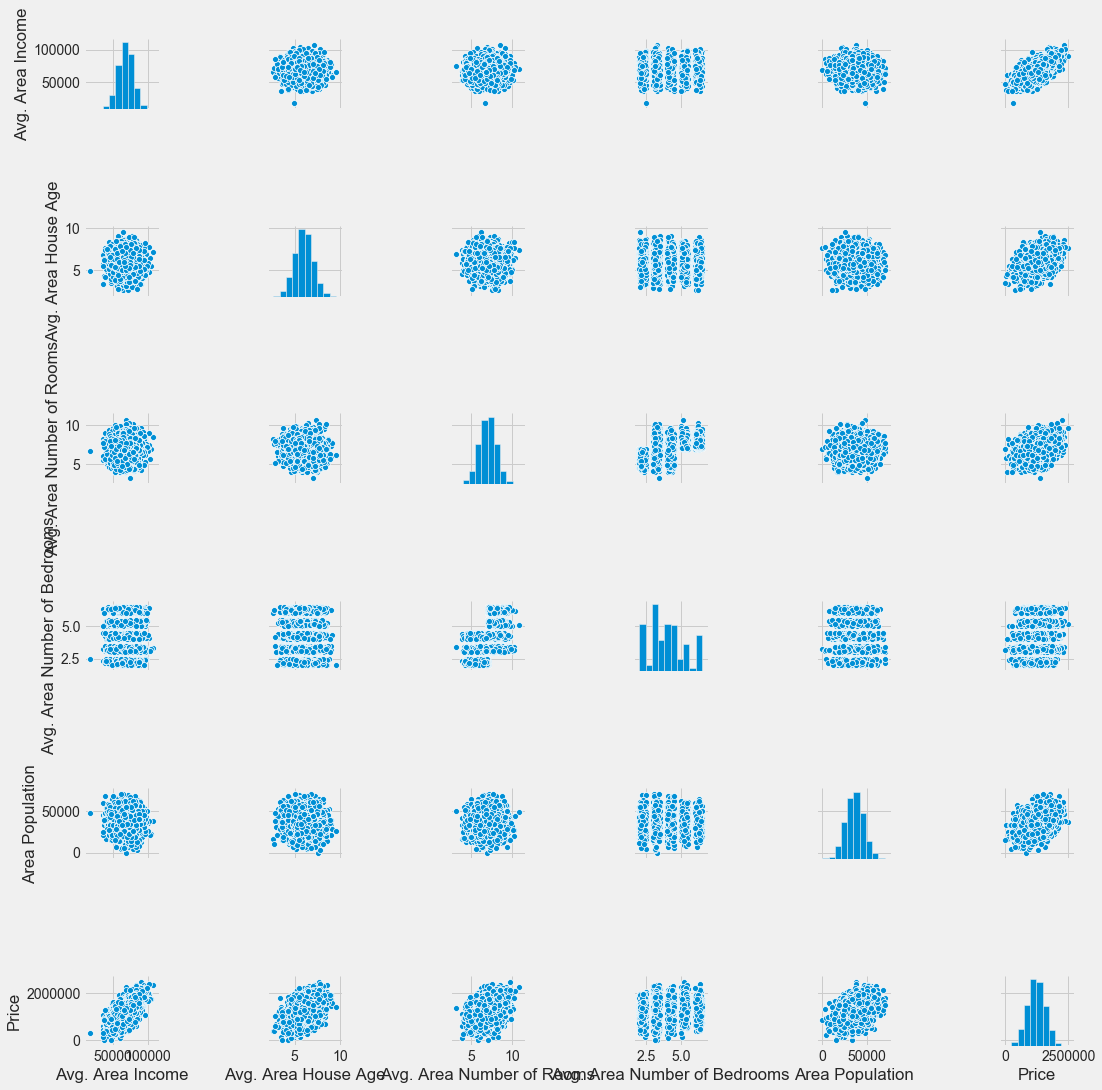

In [20]:
sns.pairplot(train)

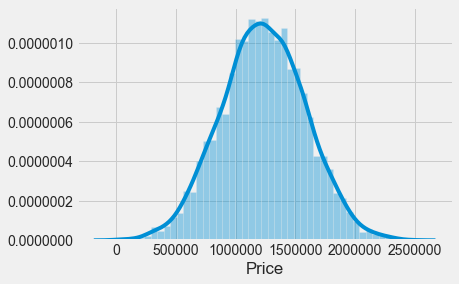

In [22]:
sns.distplot(train['Price'])

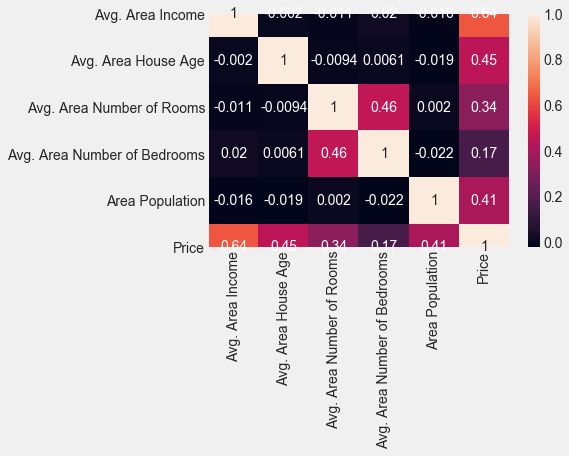

In [25]:
sns.heatmap(train.corr(), annot=True)

In [27]:
train.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [84]:
x= train[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]
y= train['Price']

In [75]:
x


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,USS Wallace\nFPO AE 73316


In [76]:
from sklearn.model_selection import train_test_split

In [86]:
X_train, X_test, Y_train, Y_test =train_test_split(x,y,test_size=0.4, random_state=101)

In [81]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score



In [82]:
def cross_val(model):
    pred = cross_val_score(model, x, y, cv=10)
    return pred.mean()


In [59]:
def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    

In [60]:
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [107]:
#LINEAR REGRESSION

In [61]:
from sklearn.linear_model import LinearRegression

In [65]:
linear_regres= LinearRegression()

In [87]:
linear_regres.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [88]:
linear_regres.coef_

array([2.15282755e+01, 1.64883282e+05, 1.22368678e+05, 2.23380186e+03,
       1.51504200e+01])

In [90]:
linear_regres.intercept_

-2640159.7968525263

In [92]:
coeff_df = pd.DataFrame(linear_regres.coef_, x.columns, columns=['Coefficient'])

In [93]:
coeff_df

,Coefficient
Avg. Area Income,21.528276
Avg. Area House Age,164883.282027
Avg. Area Number of Rooms,122368.678027
Avg. Area Number of Bedrooms,2233.801864
Area Population,15.150420


In [94]:
pred=linear_regres.predict(X_test)

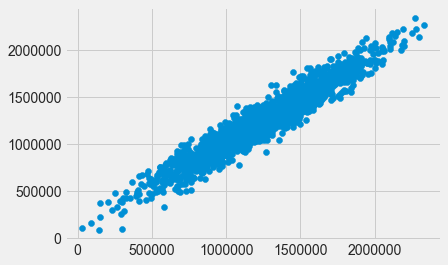

In [103]:
plt.scatter(y_test,pred)

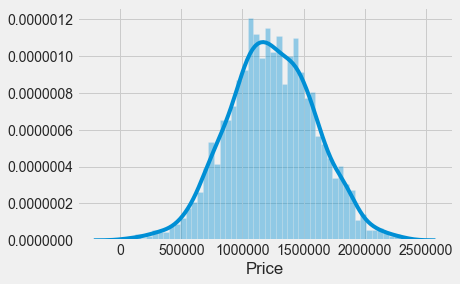

In [101]:
sns.distplot(y_test, bins=50);

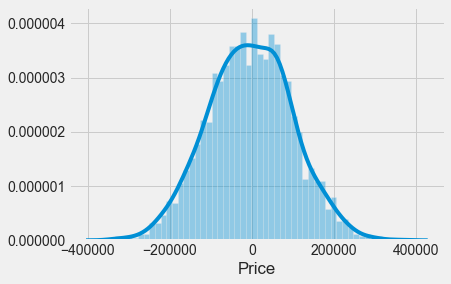

In [102]:
sns.distplot((y_test - pred), bins=50);

In [105]:
print_evaluate(Y_test,pred)

MAE: 82288.22251914948
MSE: 10460958907.209064
RMSE: 102278.8292229094
R2 Square 0.9176824009649235


In [128]:
results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,82288.222519,1.046096e+10,102278.829223,0.917682,0.917379


In [111]:
#'''Robust Regression'''

In [112]:
from sklearn.linear_model import RANSACRegressor

In [113]:
ransac= RANSACRegressor()

In [115]:
ransac.fit(X_train,Y_train)

RANSACRegressor(base_estimator=None, is_data_valid=None, is_model_valid=None,
                loss='absolute_loss', max_skips=inf, max_trials=100,
                min_samples=None, random_state=None, residual_threshold=None,
                stop_n_inliers=inf, stop_probability=0.99, stop_score=inf)

In [117]:
ransacPred =ransac.predict(X_test)

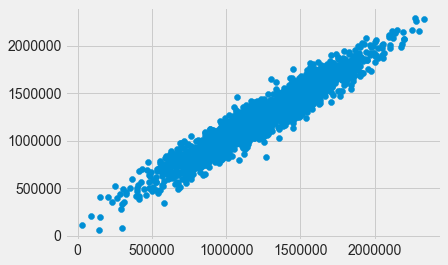

In [120]:
plt.scatter(y_test,ransacPred)

In [121]:
print_evaluate(Y_test,ransacPred)

MAE: 85170.41723584788
MSE: 11319502124.569868
RMSE: 106393.14886105152
R2 Square 0.9109264986668762


In [131]:
results_df_2 = pd.DataFrame(data=[["Robust Regression", *evaluate(Y_test, ransacPred) , cross_val(RANSACRegressor())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,82288.222519,1.046096e+10,102278.829223,0.917682,0.917379
1,Robust Regression,85170.417236,1.131950e+10,106393.148861,0.910926,0.911925


In [135]:
#### __Ridge Regression__

MAE: 82288.48130449674
MSE: 10460818408.276564
RMSE: 102278.1423779126
R2 Square 0.9176835065552325


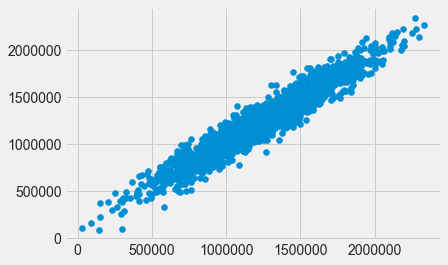

In [136]:
from sklearn.linear_model import Ridge
ridge_model = Ridge()
ridge_model.fit(X_train,y_train)
predict_y = ridge_model.predict(X_test)
plt.scatter(Y_test,predict_y)


print_evaluate(Y_test,predict_y)

In [137]:
results_df_3 = pd.DataFrame(data=[["Ridge Regression", *evaluate(Y_test, ransacPred) , cross_val(Ridge())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_3, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,82288.222519,1.046096e+10,102278.829223,0.917682,0.917379
1,Robust Regression,85170.417236,1.131950e+10,106393.148861,0.910926,0.911925
2,Ridge Regression,85170.417236,1.131950e+10,106393.148861,0.910926,0.917379


In [138]:
##LASSO regression

MAE: 82288.19406888579
MSE: 10460951134.02753
RMSE: 102278.79122294871
R2 Square 0.9176824621323219


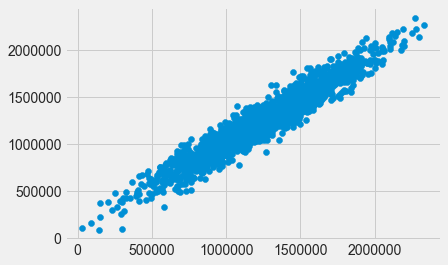

In [140]:
from sklearn.linear_model import Lasso
lasso_model = Lasso()
lasso_model.fit(X_train,y_train)
lasso_model_predict_y = lasso_model.predict(X_test)
plt.scatter(Y_test,lasso_model_predict_y)


print_evaluate(Y_test,lasso_model_predict_y)

In [141]:
results_df_4 = pd.DataFrame(data=[["Lasso Regression", *evaluate(Y_test, lasso_model_predict_y) , cross_val(Lasso())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_4, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,82288.222519,1.046096e+10,102278.829223,0.917682,0.917379
1,Robust Regression,85170.417236,1.131950e+10,106393.148861,0.910926,0.911925
2,Ridge Regression,85170.417236,1.131950e+10,106393.148861,0.910926,0.917379
3,Lasso Regression,82288.194069,1.046095e+10,102278.791223,0.917682,0.917379


In [ ]:
## elastic net

MAE: 82288.19406888579
MSE: 10460951134.02753
RMSE: 102278.79122294871
R2 Square 0.9176824621323219


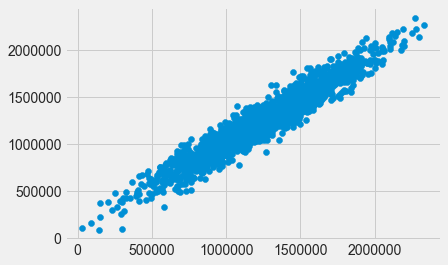

In [142]:
from sklearn.linear_model import ElasticNet
elastic_model = Lasso()
elastic_model.fit(X_train,y_train)
elastic_model_predict_y = elastic_model.predict(X_test)
plt.scatter(Y_test,lasso_model_predict_y)


print_evaluate(Y_test,elastic_model_predict_y)

In [143]:
results_df_5 = pd.DataFrame(data=[["Elastic Regression", *evaluate(Y_test, lasso_model_predict_y) , cross_val(ElasticNet())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_5, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,82288.222519,1.046096e+10,102278.829223,0.917682,0.917379
1,Robust Regression,85170.417236,1.131950e+10,106393.148861,0.910926,0.911925
2,Ridge Regression,85170.417236,1.131950e+10,106393.148861,0.910926,0.917379
3,Lasso Regression,82288.194069,1.046095e+10,102278.791223,0.917682,0.917379
4,Elastic Regression,82288.194069,1.046095e+10,102278.791223,0.917682,0.879545


In [144]:
#POlynomial regression

In [146]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(x)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.4, random_state=101)

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train,y_train)
pred = lin_reg.predict(X_test)

print_evaluate(Y_test, pred)


MAE: 82695.74508000481
MSE: 10556860761.2293
RMSE: 102746.58515604935
R2 Square 0.9169277464025661


In [147]:
results_df_2 = pd.DataFrame(data=[["Polynomail Regression", *evaluate(Y_test, pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,82288.222519,1.046096e+10,102278.829223,0.917682,0.917379
1,Robust Regression,85170.417236,1.131950e+10,106393.148861,0.910926,0.911925
2,Ridge Regression,85170.417236,1.131950e+10,106393.148861,0.910926,0.917379
3,Lasso Regression,82288.194069,1.046095e+10,102278.791223,0.917682,0.917379
4,Elastic Regression,82288.194069,1.046095e+10,102278.791223,0.917682,0.879545
5,Polynomail Regression,82695.745080,1.055686e+10,102746.585156,0.916928,0.000000
